In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import ParameterGrid


In [62]:
df = pd.read_csv('final_combined_dataset.csv')


In [63]:
df = df.drop(columns=['city','week','population','vim','vim_monthly','long','lat','cases_per_100k'])

In [64]:
df.head(10)

,date,cases,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,geocode,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,nearby_cases_weighted
0,2012-01-01,32,19.000000,79.428571,55.514486,35.000000,25.048951,29.571429,3300100,5.6804,18.3375,5.2038,18.7979,6.913995
1,2012-01-08,40,19.714286,82.285714,62.357393,47.428571,23.737513,26.571429,3300100,4.0716,16.5375,3.9114,16.8583,32.825012
2,2012-01-15,19,20.000000,83.000000,65.236264,45.571429,24.413187,28.714286,3300100,2.0555,5.0500,1.7556,3.1368,14.685214
3,2012-01-22,33,19.285714,83.000000,60.362637,43.428571,24.879121,28.857143,3300100,1.5416,5.7059,1.4138,5.2767,2.809255
4,2012-01-29,36,18.857143,80.857143,50.885924,33.142857,25.989992,30.428571,3300100,2.8204,9.3826,2.0057,7.8749,19.938997
5,2012-02-05,39,19.571429,81.571429,43.494048,22.142857,28.614927,33.571429,3300100,3.8170,25.9830,3.8228,26.0478,8.766989
6,2012-02-12,37,20.142857,80.142857,56.778911,40.571429,25.791314,29.571429,3300100,4.0861,29.4086,4.0920,29.0110,12.823065
7,2012-02-19,33,21.857143,74.000000,51.458425,34.428571,27.253296,31.285714,3300100,0.5962,4.0133,0.4783,3.2643,12.077424
8,2012-02-26,46,20.714286,80.142857,43.760989,21.285714,28.902930,34.000000,3300100,0.8143,3.8456,0.8171,3.8703,6.661086
9,2012-03-04,42,20.428571,71.714286,48.333639,28.428571,26.467491,30.857143,3300100,1.1867,5.3867,0.6647,3.8741,3.513488


In [65]:
df['date'] = pd.to_datetime(df['date'])

In [66]:
# columns = df.columns
# print(columns)
geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]
#geocode_list = [3303807]

df = df[df['geocode'].isin(geocode_list)]
df

,date,cases,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,geocode,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,nearby_cases_weighted
4018,2012-01-01,2,19.857143,94.000000,79.111596,58.714286,23.933303,29.000000,3300407,5.6804,18.3375,5.8193,18.2033,7.160385
4019,2012-01-08,12,21.285714,94.142857,75.272628,52.714286,25.450976,30.714286,3300407,4.2447,16.5375,4.1346,16.4440,16.139510
4020,2012-01-15,3,22.000000,93.142857,73.855849,52.714286,26.349068,32.428571,3300407,2.6650,5.0500,2.5732,5.6078,2.194477
4021,2012-01-22,7,21.000000,92.285714,70.573684,51.714286,26.285197,31.000000,3300407,2.0622,8.0945,2.1152,8.2576,7.703821
4022,2012-01-29,16,20.000000,91.142857,72.372705,50.714286,25.323197,30.571429,3300407,3.2630,13.1657,3.2652,13.7188,7.815267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29843,2022-11-27,0,18.857143,99.151789,79.717112,62.238677,23.775511,27.857143,3303807,4.9788,17.2846,5.2366,18.7300,0.057725
29844,2022-12-04,3,20.285714,100.000000,77.826146,58.211681,25.071428,28.857143,3303807,1.8253,8.1846,1.6286,7.5757,0.402506
29845,2022-12-11,3,18.833333,98.002307,77.462712,61.559047,23.904762,27.833333,3303807,3.2077,13.9077,2.1048,10.0949,0.000000
29846,2022-12-18,8,19.500000,96.987255,82.448150,74.983709,22.517858,24.500000,3303807,2.4548,6.2721,2.5137,6.5264,0.000000


In [67]:
# Filter the DataFrame by geocodes of interest
geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]
df = df[df['geocode'].isin(geocode_list)]

# List of features to lag
features_to_lag = [
    "cases", "tempe_min", "humidity_max", "humidity_avg", "humidity_min",
    "temp_avg", "temp_max", "precipitation_avg_ordinary_kriging",
    "precipitation_max_ordinary_kriging", "precipitation_avg_regression_kriging",
    "precipitation_max_regression_kriging", "nearby_cases_weighted"
]

# Create lags for all features in features_to_lag for 1 to 12 weeks
lags = range(1, 12)

def create_lags(group, features, lags):
    for feature in features:
        for lag in lags:
            group[f"{feature}_lag_{lag}"] = group[feature].shift(lag)
    return group

# Group by geocode and apply lag creation
df = df.groupby('geocode', group_keys=False).apply(create_lags, features=features_to_lag, lags=lags)

# Remove rows with NaN values (due to lagging)
# df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[12:].reset_index(drop=True))

# Reset index for final cleaned DataFrame
# df.reset_index(drop=True, inplace=True)

df


C:\Users\user\AppData\Local\Temp\ipykernel_9088\273827451.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group[f"{feature}_lag_{lag}"] = group[feature].shift(lag)
C:\Users\user\AppData\Local\Temp\ipykernel_9088\273827451.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group[f"{feature}_lag_{lag}"] = group[feature].shift(lag)
C:\Users\user\AppData\Local\Temp\ipykernel_9088\273827451.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,date,cases,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,geocode,precipitation_avg_ordinary_kriging,...,nearby_cases_weighted_lag_2,nearby_cases_weighted_lag_3,nearby_cases_weighted_lag_4,nearby_cases_weighted_lag_5,nearby_cases_weighted_lag_6,nearby_cases_weighted_lag_7,nearby_cases_weighted_lag_8,nearby_cases_weighted_lag_9,nearby_cases_weighted_lag_10,nearby_cases_weighted_lag_11
4018,2012-01-01,2,19.857143,94.000000,79.111596,58.714286,23.933303,29.000000,3300407,5.6804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4019,2012-01-08,12,21.285714,94.142857,75.272628,52.714286,25.450976,30.714286,3300407,4.2447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4020,2012-01-15,3,22.000000,93.142857,73.855849,52.714286,26.349068,32.428571,3300407,2.6650,...,7.160385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4021,2012-01-22,7,21.000000,92.285714,70.573684,51.714286,26.285197,31.000000,3300407,2.0622,...,16.139510,7.160385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4022,2012-01-29,16,20.000000,91.142857,72.372705,50.714286,25.323197,30.571429,3300407,3.2630,...,2.194477,16.139510,7.160385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29843,2022-11-27,0,18.857143,99.151789,79.717112,62.238677,23.775511,27.857143,3303807,4.9788,...,0.103270,4.975149,3.075556,1.127680,0.000000,0.144795,0.138322,3.518035,1.144805,0.000000
29844,2022-12-04,3,20.285714,100.000000,77.826146,58.211681,25.071428,28.857143,3303807,1.8253,...,2.562122,0.103270,4.975149,3.075556,1.127680,0.000000,0.144795,0.138322,3.518035,1.144805
29845,2022-12-11,3,18.833333,98.002307,77.462712,61.559047,23.904762,27.833333,3303807,3.2077,...,0.057725,2.562122,0.103270,4.975149,3.075556,1.127680,0.000000,0.144795,0.138322,3.518035
29846,2022-12-18,8,19.500000,96.987255,82.448150,74.983709,22.517858,24.500000,3303807,2.4548,...,0.402506,0.057725,2.562122,0.103270,4.975149,3.075556,1.127680,0.000000,0.144795,0.138322


In [68]:
geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]

#geocode_list = [3303807]
df = df[df['geocode'].isin(geocode_list)]

lag_columns = ['cases_lag1', 'cases_lag2', 'cases_lag3', 'cases_lag4','cases_lag5','cases_lag6','cases_lag7','cases_lag8','cases_lag9','cases_lag10','cases_lag11','cases_lag12']

df = df.groupby('geocode', group_keys=False).apply(lambda group: group.assign(
    cases_lag1=group['cases'].shift(1),
    cases_lag2=group['cases'].shift(2),
    cases_lag3=group['cases'].shift(3),
    cases_lag4=group['cases'].shift(4),
    cases_lag5=group['cases'].shift(5),
    cases_lag6=group['cases'].shift(6),
    cases_lag7=group['cases'].shift(7),
    cases_lag8=group['cases'].shift(8),
    cases_lag9=group['cases'].shift(9),
    cases_lag10=group['cases'].shift(10),
    cases_lag11=group['cases'].shift(11),
    cases_lag12=group['cases'].shift(12)
))

df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[12:].reset_index(drop=True))

df.reset_index(drop=True, inplace=True)

df



C:\Users\user\AppData\Local\Temp\ipykernel_9088\1465222807.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('geocode', group_keys=False).apply(lambda group: group.assign(
C:\Users\user\AppData\Local\Temp\ipykernel_9088\1465222807.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[12:].reset_index(drop=True))


,date,cases,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,geocode,precipitation_avg_ordinary_kriging,...,cases_lag3,cases_lag4,cases_lag5,cases_lag6,cases_lag7,cases_lag8,cases_lag9,cases_lag10,cases_lag11,cases_lag12
0,2012-03-25,7,20.857143,94.142857,79.977813,59.714286,24.929724,30.000000,3300407,3.8166,...,12.0,16.0,9.0,9.0,11.0,16.0,7.0,3.0,12.0,2.0
1,2012-04-01,10,20.714286,93.285714,75.732920,54.714286,25.530021,30.857143,3300407,2.7552,...,17.0,12.0,16.0,9.0,9.0,11.0,16.0,7.0,3.0,12.0
2,2012-04-08,6,21.142857,94.000000,74.875619,51.857143,25.970530,31.571429,3300407,0.8143,...,52.0,17.0,12.0,16.0,9.0,9.0,11.0,16.0,7.0,3.0
3,2012-04-15,7,19.428571,94.000000,75.795290,52.142857,24.024068,29.142857,3300407,2.0607,...,7.0,52.0,17.0,12.0,16.0,9.0,9.0,11.0,16.0,7.0
4,2012-04-22,1,19.714286,94.000000,79.692905,59.714286,23.415047,28.857143,3300407,1.1071,...,10.0,7.0,52.0,17.0,12.0,16.0,9.0,9.0,11.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2022-11-27,0,18.857143,99.151789,79.717112,62.238677,23.775511,27.857143,3303807,4.9788,...,10.0,15.0,7.0,5.0,3.0,3.0,1.0,2.0,5.0,2.0
2806,2022-12-04,3,20.285714,100.000000,77.826146,58.211681,25.071428,28.857143,3303807,1.8253,...,11.0,10.0,15.0,7.0,5.0,3.0,3.0,1.0,2.0,5.0
2807,2022-12-11,3,18.833333,98.002307,77.462712,61.559047,23.904762,27.833333,3303807,3.2077,...,7.0,11.0,10.0,15.0,7.0,5.0,3.0,3.0,1.0,2.0
2808,2022-12-18,8,19.500000,96.987255,82.448150,74.983709,22.517858,24.500000,3303807,2.4548,...,0.0,7.0,11.0,10.0,15.0,7.0,5.0,3.0,3.0,1.0


In [71]:
import pandas as pd

# Assuming df is your DataFrame

# Filter only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlations of all numeric features with 'cases'
correlation_with_cases = df[numeric_cols].corr()["cases"].drop("cases")

# Grouping features by prefix (e.g., temp_min, humidity_max, etc.)
grouped_features = {}
for col in correlation_with_cases.index:
    prefix = "_".join(col.split("_")[:2])  # Extract the prefix (e.g., temp_min)
    grouped_features.setdefault(prefix, []).append(col)

# Display correlation values for each feature group
for group, features in grouped_features.items():
    print(f"Correlation of {group} Lagged Features with Cases:")
    correlations = correlation_with_cases[features]
    print(correlations.sort_index())  # Print correlations sorted by lag order
    print("\n" + "-" * 50 + "\n")


Correlation of tempe_min Lagged Features with Cases:
tempe_min           0.132453
tempe_min_lag_1     0.149701
tempe_min_lag_10    0.211630
tempe_min_lag_11    0.211241
tempe_min_lag_2     0.163011
tempe_min_lag_3     0.177186
tempe_min_lag_4     0.190160
tempe_min_lag_5     0.198219
tempe_min_lag_6     0.202882
tempe_min_lag_7     0.205813
tempe_min_lag_8     0.208077
tempe_min_lag_9     0.211308
Name: cases, dtype: float64

--------------------------------------------------

Correlation of humidity_max Lagged Features with Cases:
humidity_max           0.134910
humidity_max_lag_1     0.122291
humidity_max_lag_10    0.079517
humidity_max_lag_11    0.065509
humidity_max_lag_2     0.115771
humidity_max_lag_3     0.112322
humidity_max_lag_4     0.109219
humidity_max_lag_5     0.112611
humidity_max_lag_6     0.103450
humidity_max_lag_7     0.097068
humidity_max_lag_8     0.088218
humidity_max_lag_9     0.085876
Name: cases, dtype: float64

-------------------------------------------------

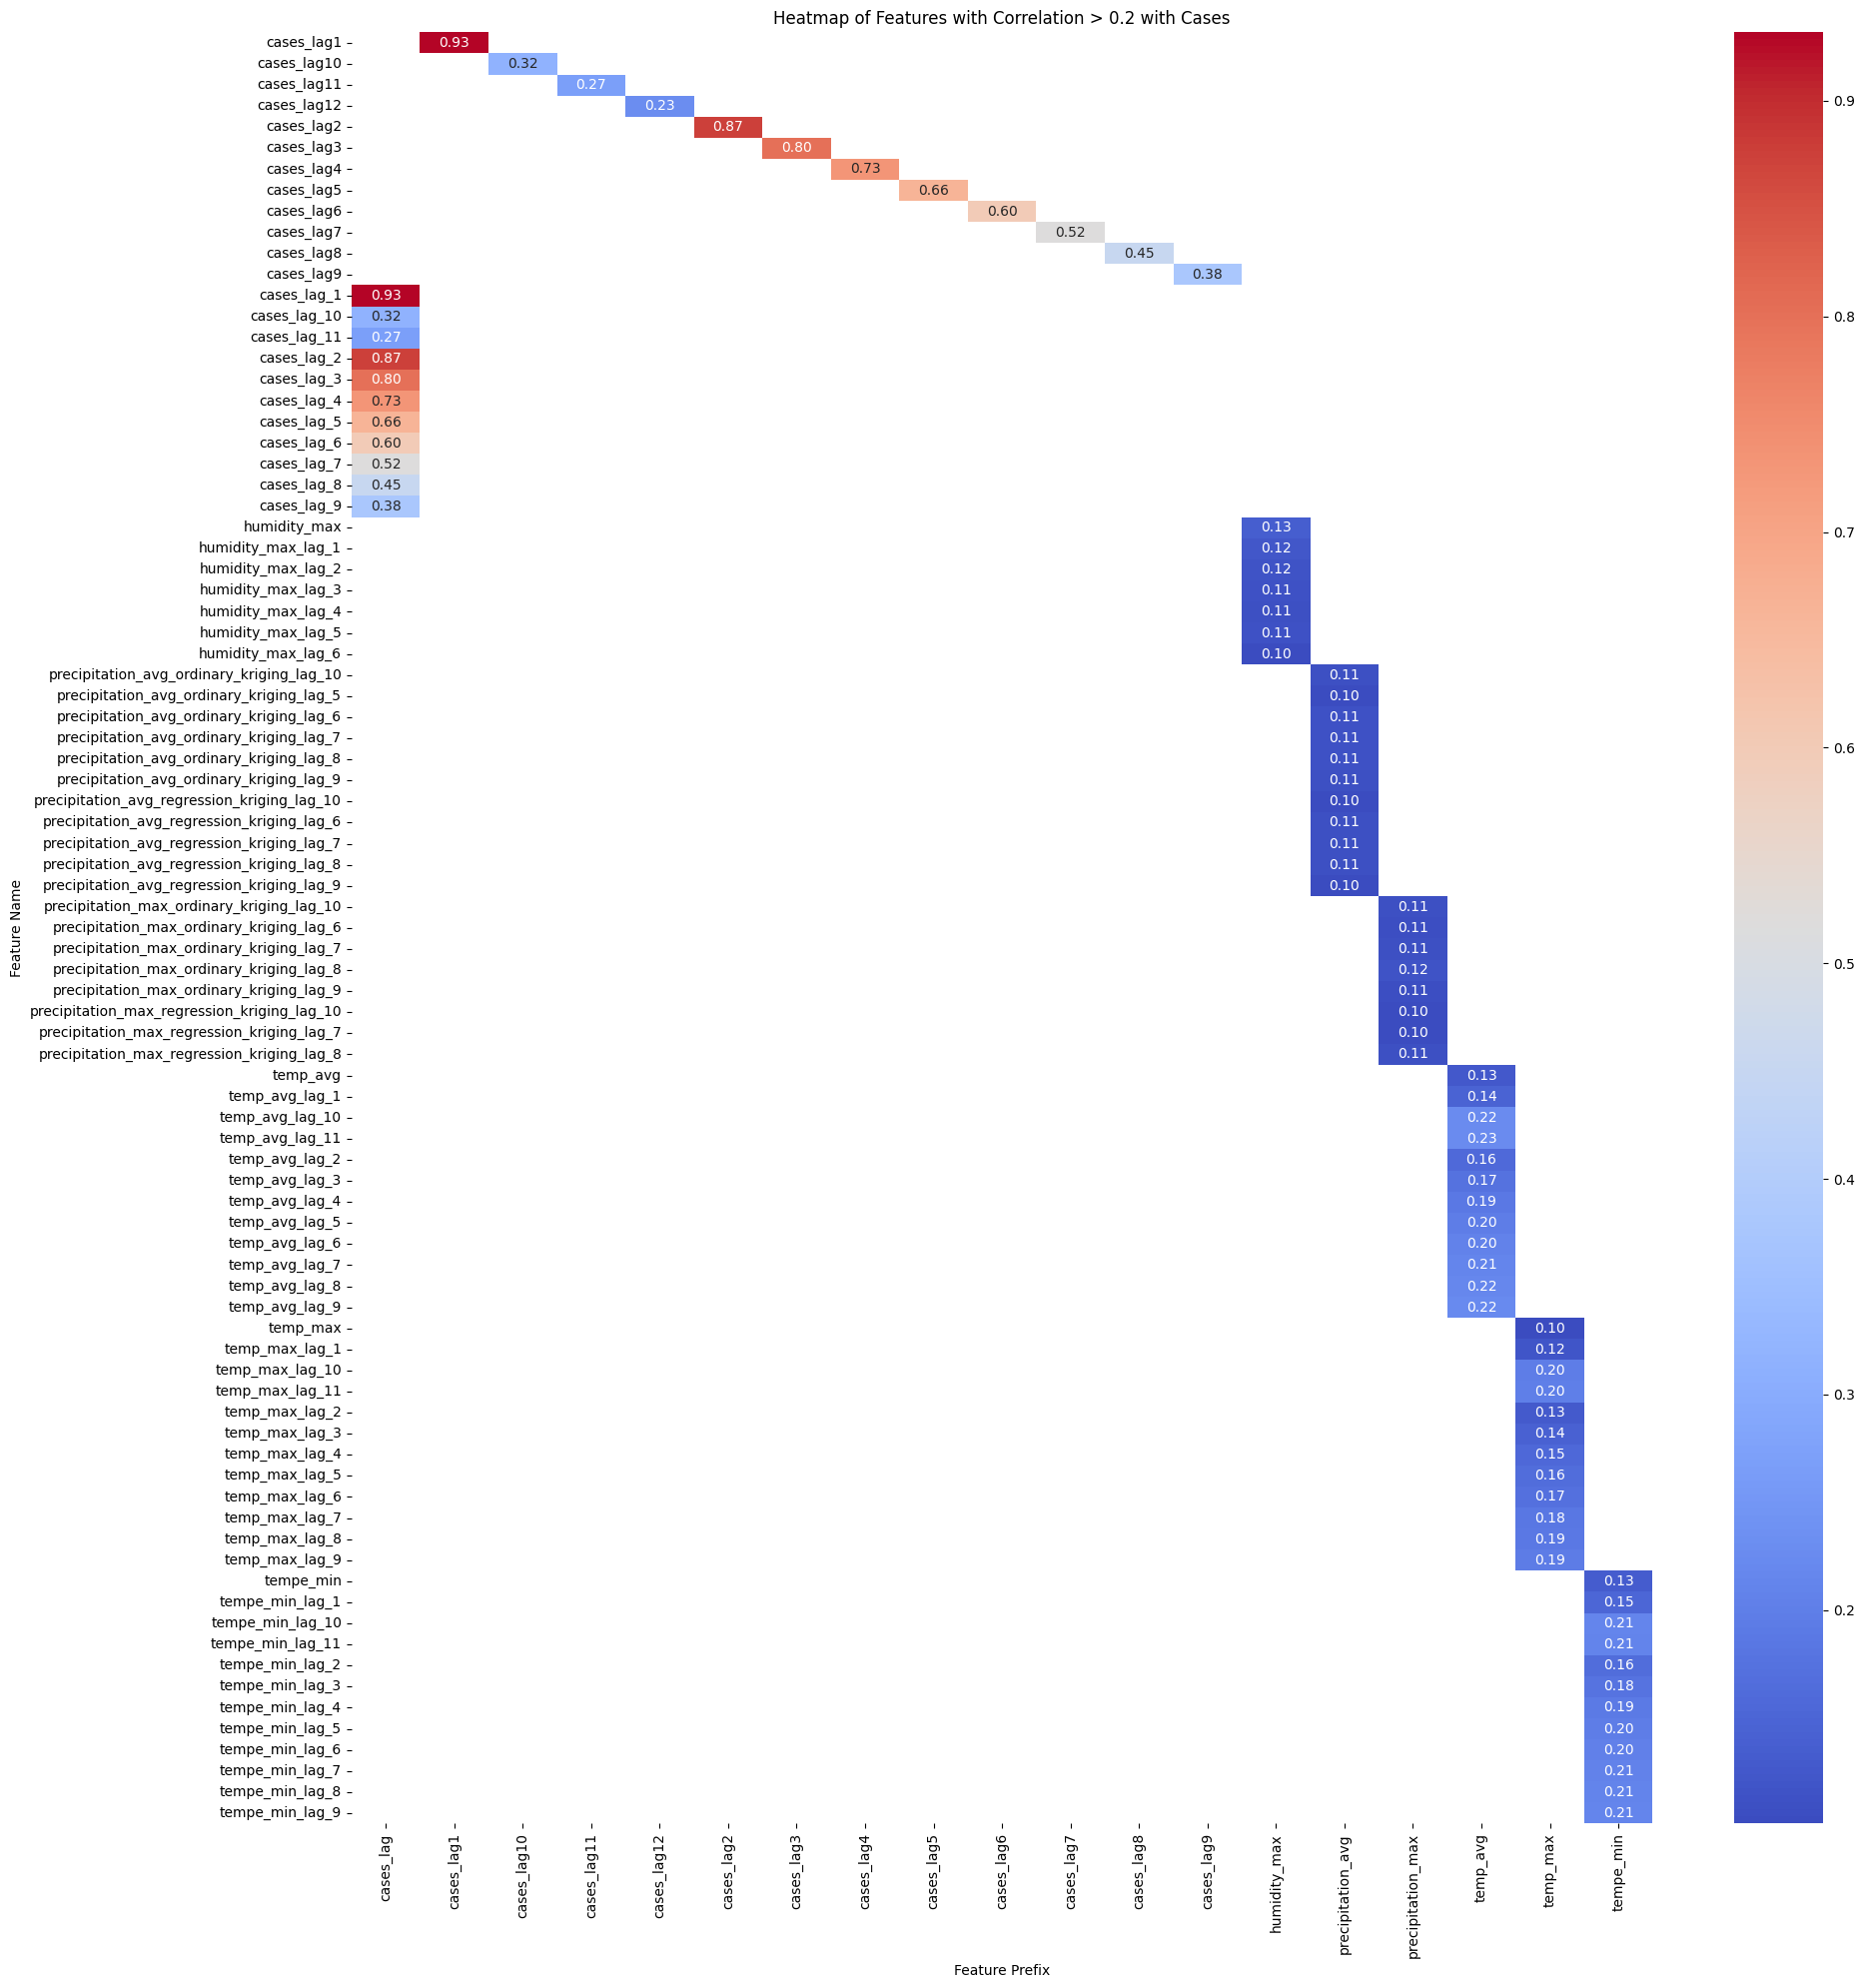

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter correlations with absolute values greater than 0.2
filtered_correlations = correlation_with_cases[correlation_with_cases.abs() > 0.1]

# Grouping features by prefix (e.g., temp_min, humidity_max, etc.)
grouped_features = {}
for col in filtered_correlations.index:
    prefix = "_".join(col.split("_")[:2])  # Extract the prefix (e.g., temp_min)
    grouped_features.setdefault(prefix, []).append(col)

# Create a DataFrame for the heatmap
heatmap_data = filtered_correlations.to_frame(name="Correlation").reset_index()
heatmap_data["Prefix"] = heatmap_data["index"].apply(lambda x: "_".join(x.split("_")[:2]))

# Create a pivot table for the heatmap
heatmap_data = heatmap_data.pivot_table(index="index", columns="Prefix", values="Correlation")

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Heatmap of Features with Correlation > 0.2 with Cases")
plt.xlabel("Feature Prefix")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


In [ ]:
tempe_max_avg-5,6
precipitation-avg - ordinary krigging-6 choosen
humidity_avg lag 6